In [1]:
#импорт библиотек
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter

#считывание данных, в том числе парсинг дат
customers   = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/Intermediate_project/olist_customers_dataset.csv")
orders      = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/Intermediate_project/olist_orders_dataset.csv",
                    parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
order_items = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/Intermediate_project/olist_order_items_dataset.csv",
                    parse_dates=['shipping_limit_date'])

Для начала посмотрим на загруженные данные

In [2]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

При изучении данных были выявлены следующие логические несостыковки:
- покупателю доставили заказ раньше, чем передали его в логистическую службу;
- заказ доставлен, но даты доставки нет;
- заказ доставлен, дата доставки есть, но в логистическую службу заказ не передавали.

Будем считать эти данные ошибочными и исключим их из анализа.
Есть заказы, которые доставили раньше, чем они были оплачены - такое допущение принимаем как функцию "оплата при получении".

In [8]:
#объединение таблиц и исключение ошибочных данных
data = orders[orders.order_status=="delivered"]\
    .query('order_delivered_carrier_date.isna()==False\
    and order_delivered_customer_date.isna()==False\
    and order_delivered_customer_date > order_delivered_carrier_date')\
    .append(orders[orders.order_status!="delivered"])\
    .merge(order_items, on='order_id', how='left')\
    .merge(customers, on='customer_id')

In [9]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Определим некоторые понятия.

В качестве заказа считаем любой заказ (в том числе недоставленный, отмененный и недоступный), так как обращаем внимание только на факт оформления заказа. 

За покупку считаем оплаченный (до или после) доставки заказ (смотрим дату подтверждения оплаты) - так как важен факт приобретения товаров в обмен на денежное вознаграждение.

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [10]:
one_purchase = data[data.order_approved_at.isna()==False]\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'order_id':'nunique'})\
    .query('order_id==1')\
    .order_id.count()

In [11]:
print(f"{one_purchase} пользователя, совершивших одну покупку")

93016 пользователя, совершивших одну покупку


### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

В качестве недоставленного заказа считаем:
- недоступные заказы (отсутствуют товарные позиции, входящие в заказы, либо товары есть в наличии, но заказы не переданы партнеру по логистике);
- отмененные заказы до их доставки клиенту.

Все остальные статусы заказов не учитываем, так как они не доставлены ввиду их еще текущей обработки (будут доставлены/отменены позже).

Также определимся, что учитываем заказы, не доставленные именно в предполагаемую дату доставки, так как дата оформления заказа не подходит (заказ мог быть оформлен в конце месяца и времени на доставку нет) и дата подтверждения оплаты не подходит (заказ может быть оплачен после его доставки).

In [12]:
#добавим колонку с месяцем предполагаемой даты доставки
orders['month'] = orders.order_estimated_delivery_date.dt.month

In [13]:
undelivered = orders[orders.order_delivered_customer_date.isna()]\
    .query('order_status in ["canceled", "unavailable"]')\
    .groupby(['order_status','month'], as_index=False)\
    .agg({'order_id':'count'})\
    .groupby(['order_status'], as_index=False)\
    .agg({'order_id':'mean'})\
    .rename(columns={'order_id':'avg_undelivered_orders'})\
    .round(2)
avg_undelivered = round(undelivered.avg_undelivered_orders.sum() / undelivered.avg_undelivered_orders.count(),2)

In [14]:
print(f"{avg_undelivered} заказов в месяц в среднем не доставляется \n\nДетализация по причинам \n {undelivered}")

51.16 заказов в месяц в среднем не доставляется 

Детализация по причинам 
   order_status  avg_undelivered_orders
0     canceled                   51.58
1  unavailable                   50.75


### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [15]:
#добавим колонку с днем покупки (используем время подтверждения оплаты заказа)
data['day_of_purchase'] = data.order_approved_at.dt.day_name()

In [16]:
data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday


Посчитаем количество покупок каждого товара по дням недели

In [17]:
a = data[data.order_approved_at.isna()==False]\
    .groupby(['product_id','day_of_purchase'], as_index=False)\
    .agg({'order_item_id':'count'})\
    .sort_values('product_id')\
    .pivot_table(index='product_id', columns='day_of_purchase', values='order_item_id', fill_value=0)\
    .reset_index()

In [18]:
a

day_of_purchase,product_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,00066f42aeeb9f3007548bb9d3f33c38,0,0,0,1,0,0,0
1,00088930e925c41fd95ebfe695fd2655,0,0,0,0,0,1,0
2,0009406fd7479715e4bef61dd91f2462,1,0,0,0,0,0,0
3,000b8f95fcb9e0096488278317764d19,1,0,0,0,0,0,1
4,000d9be29b5207b54e86aa1b1ac54872,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
32925,fff6177642830a9a94a0f2cba5e476d1,0,1,1,0,0,0,0
32926,fff81cc3158d2725c0655ab9ba0f712c,0,1,0,0,0,0,0
32927,fff9553ac224cec9d15d49f5a263411f,0,0,1,0,0,0,0
32928,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,0,0,0,1,3,0


Определим максимальное число покупок за день для каждого товара

In [19]:
df = data[data.order_approved_at.isna()==False]\
    .groupby(['product_id','day_of_purchase'], as_index=False)\
    .agg({'order_item_id':'count'})\
    .groupby(['product_id'], as_index=False)\
    .agg({'order_item_id':'max'})\
    .rename(columns={'order_item_id':'max_count'})\
    .sort_values('product_id')

In [20]:
df

,product_id,max_count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32925,fff6177642830a9a94a0f2cba5e476d1,1
32926,fff81cc3158d2725c0655ab9ba0f712c,1
32927,fff9553ac224cec9d15d49f5a263411f,1
32928,fffdb2d0ec8d6a61f0a0a0db3f25b441,3


Добавим максимальное число покупок за день каждого товара в таблицу с количеством покупок по дням недели

In [21]:
a = a.merge(df, on = 'product_id')

In [22]:
a.head(10)

,product_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,max_count
0,00066f42aeeb9f3007548bb9d3f33c38,0,0,0,1,0,0,0,1
1,00088930e925c41fd95ebfe695fd2655,0,0,0,0,0,1,0,1
2,0009406fd7479715e4bef61dd91f2462,1,0,0,0,0,0,0,1
3,000b8f95fcb9e0096488278317764d19,1,0,0,0,0,0,1,1
4,000d9be29b5207b54e86aa1b1ac54872,0,0,0,0,0,1,0,1
5,0011c512eb256aa0dbbb544d8dffcf6e,0,0,0,0,1,0,0,1
6,00126f27c813603687e6ce486d909d01,0,0,0,2,0,0,0,2
7,001795ec6f1b187d37335e1c4704762e,1,3,2,0,0,2,1,3
8,001b237c0e9bb435f2e54071129237e9,1,0,0,0,0,0,0,1
9,001b72dfd63e9833e8c02742adf472e3,2,0,3,1,4,2,2,4


Максимальное количество покупок одного товара может быть совершено в разные дни недели.

Чтобы это учесть, был написан цикл, который для каждого товара (таблица a) проверяет число покупок за каждый день недели с максимальным числом покупок этого товара за день (max_count). Если значения совпадают, тогда этот день недели учитывается в результирующей таблице (days_of_purchase) 

In [23]:
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']
days_of_purchase = pd.DataFrame()
# для каждой строки с товаром 
for row in a.itertuples(): 
    days = ''
    l = []
    # для каждого дня недели 
    for i in day:
        # сравниваем число покупок в день недели с максимальным числом покупок и добавляем день недели в список при совпадении
        if a.iloc[row.Index][i] == a.iloc[row.Index]['max_count']:
            l.append(i)
    for i in l:
        days += str(i)+ " "
    # добавляем в итоговую таблицу список дней недели с максимальным числом покупок каждого товара и id товара
    days_of_purchase = days_of_purchase.append({'days': days, 'product_id': a.iloc[row.Index]['product_id']},ignore_index=True)

In [24]:
days_of_purchase

,days,product_id
0,Sunday,00066f42aeeb9f3007548bb9d3f33c38
1,Tuesday,00088930e925c41fd95ebfe695fd2655
2,Friday,0009406fd7479715e4bef61dd91f2462
3,Wednesday Friday,000b8f95fcb9e0096488278317764d19
4,Tuesday,000d9be29b5207b54e86aa1b1ac54872
...,...,...
32925,Monday Saturday,fff6177642830a9a94a0f2cba5e476d1
32926,Monday,fff81cc3158d2725c0655ab9ba0f712c
32927,Saturday,fff9553ac224cec9d15d49f5a263411f
32928,Tuesday,fffdb2d0ec8d6a61f0a0a0db3f25b441


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [25]:
# данные о количестве покупок каждого пользователя в разрезе месяцев (добавлены столбцы с месяцем покупки и количеством в нем дней)
purchases_month = data[data.order_approved_at.isna()==False]\
    .assign(month_of_purchase=data.order_approved_at.dt.month_name())\
    .assign(days_in_month=data.order_approved_at.dt.days_in_month)\
    .groupby(['customer_unique_id', 'month_of_purchase','days_in_month'], as_index=False)\
    .agg({'order_id':'nunique'})\
    .rename(columns={'order_id':'count_of_purchases'})


In [26]:
purchases_month.head(5)

,customer_unique_id,month_of_purchase,days_in_month,count_of_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,May,31.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,31.0,1
2,0000f46a3911fa3c0805444483337064,March,31.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,October,31.0,1
4,0004aac84e0df4da2b147fca70cf8255,November,30.0,1


In [27]:
# среднее количество покупок в неделю по месяцам для каждого пользователя (week_avg_of_purchases)
purchases_month.assign(week_avg_of_purchases = 7*purchases_month['count_of_purchases']/purchases_month.days_in_month)\
[['customer_unique_id','month_of_purchase','week_avg_of_purchases']]

,customer_unique_id,month_of_purchase,week_avg_of_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,May,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,0.225806
2,0000f46a3911fa3c0805444483337064,March,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,October,0.225806
4,0004aac84e0df4da2b147fca70cf8255,November,0.233333
...,...,...,...
97824,fffcf5a5ff07b0908bd4e2dbc735a684,June,0.233333
97825,fffea47cd6d3cc0a88bd621562a9d061,December,0.225806
97826,ffff371b4d645b6ecea244b27531430a,February,0.250000
97827,ffff5962728ec6157033ef9805bacc48,May,0.225806


### 5. Используя pandas, проведи когортный анализ пользователей.

Так как необходимо посчитать коэффициент удержания пользователей, то будем рассматривать любую вовлеченность клиента, то есть все заказы

In [28]:
data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday


In [29]:
# создадим таблицу с заказами пользователей
df = data[['customer_unique_id', 'order_purchase_timestamp']]

In [30]:
# таблица с первыми заказами клиентов (так как отдельной даты с регистрацией пользователя в исходных данных нет)
first_order = data.groupby('customer_unique_id', as_index=False)\
    .agg({'order_purchase_timestamp': 'min'})\
    .rename(columns={'order_purchase_timestamp':'cohort'})

In [31]:
first_order.head(5)

,customer_unique_id,cohort
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [32]:
# объединим данные о заказах пользователей и датой регистрации (оставим только год-месяц)
df = df.merge(first_order, on = 'customer_unique_id', how = 'left')
df['order_purchase_timestamp'] = df.order_purchase_timestamp.dt.to_period('M') 
df['cohort'] = df.cohort.dt.to_period('M') 

In [33]:
df.head()

,customer_unique_id,order_purchase_timestamp,cohort
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02


In [34]:
# сгруппируем данные по первой оплате и по заказам и выведем количество уникальных пользователей
cohort_data = df.groupby(['cohort', 'order_purchase_timestamp'],as_index=False)\
    .agg({'customer_unique_id': 'nunique'})\
    .rename(columns={'customer_unique_id':'customers'})\
    .query('cohort >= "2017-01" and cohort <= "2017-12"')\
    .reset_index(drop=True)

In [35]:
# добавим number, указывающее на количество периодов между месяцем когорты и месяцем покупки
cohort_data['number'] = (cohort_data.order_purchase_timestamp - cohort_data.cohort).apply(attrgetter('n'))

In [36]:
cohort_data

,cohort,order_purchase_timestamp,customers,number
0,2017-01,2017-01,762,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
166,2017-12,2018-04,15,4
167,2017-12,2018-05,11,5
168,2017-12,2018-06,9,6
169,2017-12,2018-07,3,7


In [37]:
# развернем таблицу для наглядности
cohort_data.pivot_table(index='cohort', columns ='number', values ='customers')

number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,762.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1750.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2635.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3594.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN
2017-06,3138.0,14.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3881.0,19.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4182.0,29.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4129.0,28.0,22.0,12.0,19.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# добавим размер кагорты
cohort_size = cohort_data.pivot_table(index='cohort', columns ='number', values ='customers').iloc[:,0]

In [39]:
# создадим таблицу с retention каждой когорты
retention_data = cohort_data.pivot_table(index='cohort',columns ='number',values ='customers')\
    .divide(cohort_size, axis = 0)

In [40]:
retention_data

number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.003937,0.002625,0.001312,0.003937,0.001312,0.005249,0.001312,0.001312,NaN,0.003937,0.001312,0.007874,0.003937,0.001312,0.001312,0.002625,0.003937,0.001312
2017-02,1.0,0.002286,0.002857,0.001143,0.004000,0.001143,0.002286,0.001714,0.001714,0.002286,0.001143,0.002857,0.001714,0.001714,0.001143,0.000571,0.000571,0.002286,NaN
2017-03,1.0,0.004934,0.003795,0.003795,0.003416,0.001518,0.001518,0.003036,0.003416,0.000759,0.003795,0.001518,0.002277,0.001139,0.001518,0.002277,0.000759,0.001518,NaN
2017-04,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126,NaN,NaN
2017-05,1.0,0.005008,0.005008,0.003895,0.003061,0.003339,0.004174,0.001669,0.002504,0.003061,0.002504,0.003339,0.002504,0.000278,0.001948,0.002504,NaN,NaN,NaN
2017-06,1.0,0.004461,0.003505,0.004143,0.002549,0.003824,0.003824,0.002231,0.001275,0.002231,0.003187,0.003505,0.001593,0.001275,0.001912,NaN,NaN,NaN,NaN
2017-07,1.0,0.004896,0.003607,0.002577,0.002834,0.002061,0.003092,0.001031,0.001804,0.002577,0.002319,0.003092,0.001288,0.002577,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006934,0.003348,0.002630,0.003587,0.005261,0.002869,0.002630,0.001435,0.001435,0.002391,0.001913,0.000956,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006781,0.005328,0.002906,0.004602,0.002180,0.002180,0.002422,0.002906,0.001695,0.002664,0.000727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


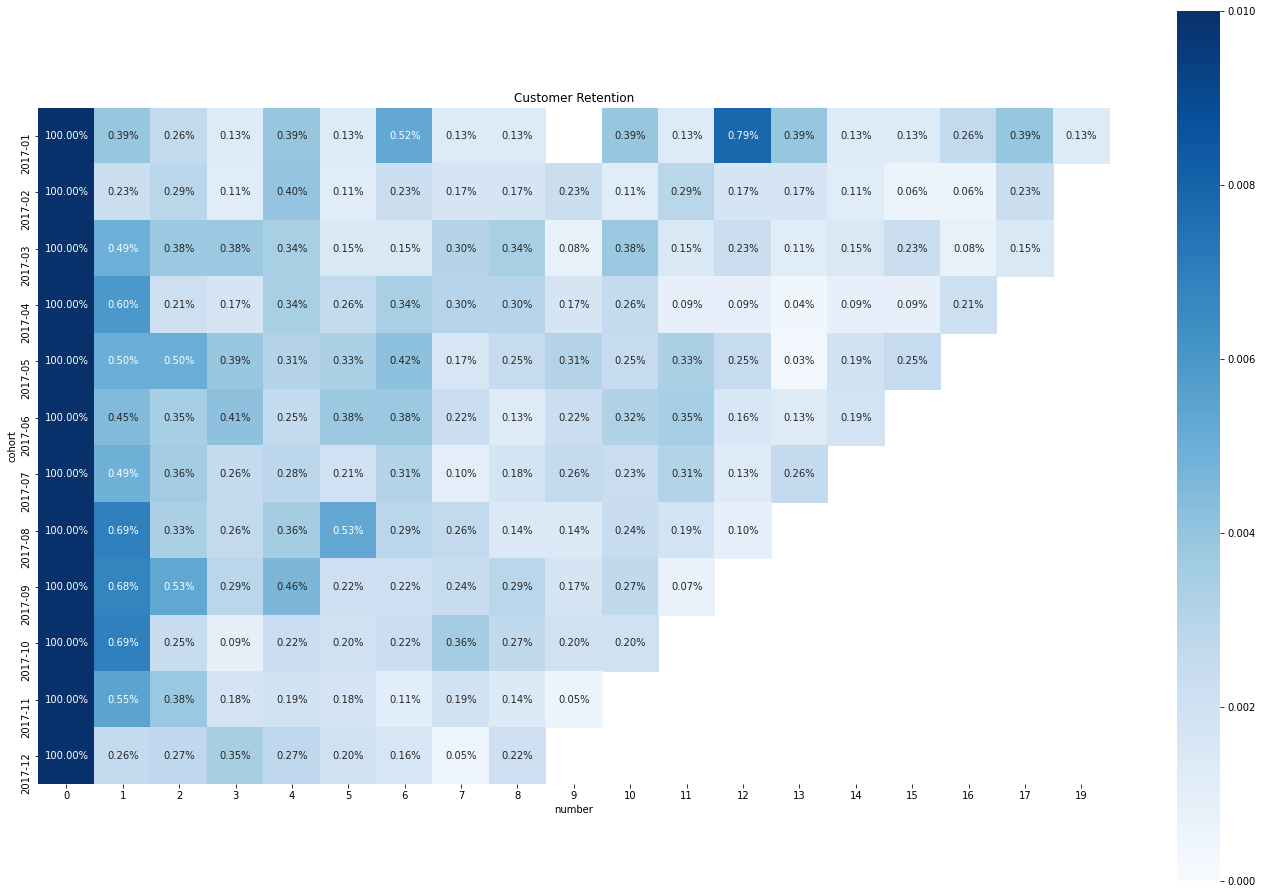

In [41]:
# для наглядности отобразим данные в виде графика
plt.figure(figsize=(24, 16))
plt.title("Customer Retention")
sns.heatmap(retention_data, fmt='.2%',vmin=0.0,vmax=0.01, mask=retention_data.isnull(),annot = True, cmap='Blues',square=True)

В период с января по декабрь 2017 года с самым высоким retention на 3й месяц оказалась когорта 06-2017 


### 6 Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [42]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday


Временные рамки данных

In [43]:
print('Заказы с {} по {}'.format(data['order_approved_at'].min(), data['order_approved_at'].max()))

Заказы с 2016-09-15 12:16:38 по 2018-09-03 17:40:06


Frequency - суммарное количество покупок у пользователя за всё время 

Monetary - сумма покупок за всё время. 

In [44]:
# объединим данные с покупками по клиентам
# посчитаем количество сделанных ими заказов, сумму по всем заказам клиента и оставим дату только последнего заказа
data_rfm = data[data.order_approved_at.isna()==False].groupby('customer_unique_id', as_index=False)\
    .agg({'order_id':'nunique', 'price':'sum', 'order_approved_at':'max'})\
    .rename(columns={'order_id':'frequency','price':'monetary', 'order_approved_at':'last_order'})

In [45]:
data_rfm.head()

,customer_unique_id,frequency,monetary,last_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,1,69.00,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,2017-11-14 20:06:52


In [46]:
# определим дату отсчета, как следующий день после последней совершенной покупки
from datetime import timedelta
current_date = data_rfm['last_order'].max() + timedelta(days=1)
current_date

Timestamp('2018-09-04 17:40:06')

R - время от последней покупки пользователя до текущей даты

In [47]:
data_rfm['recency'] = data_rfm['last_order'].apply(lambda x: (current_date - x).days)
data_rfm.head()

,customer_unique_id,frequency,monetary,last_order,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,2018-05-10 11:11:18,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,2018-05-07 18:25:44,119
2,0000f46a3911fa3c0805444483337064,1,69.00,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,2017-10-12 20:49:17,326
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,2017-11-14 20:06:52,293


Теперь посмотрим на данные повнимательней 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


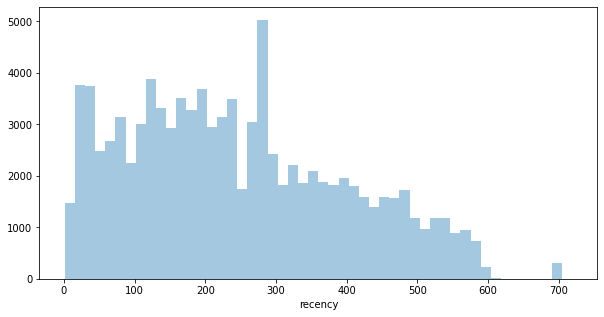

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(data_rfm.recency, kde=False)

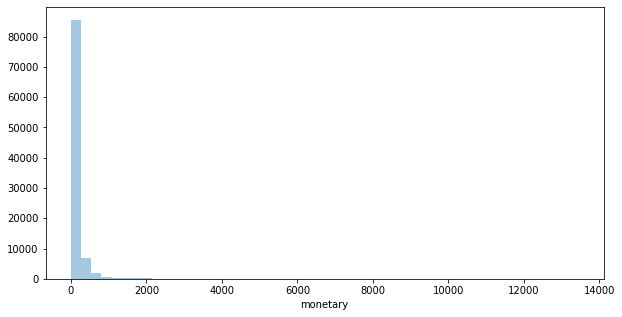

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(data_rfm.monetary,kde=False)

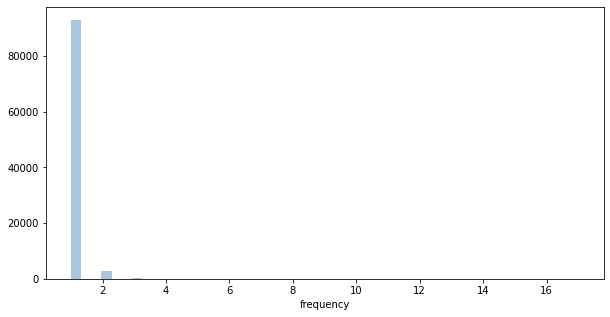

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(data_rfm.frequency,kde=False)

Посмотрим на квантили каждого параметра

In [51]:
quintiles = data_rfm[['monetary', 'recency', 'frequency']].quantile([.33, .66]).to_dict()
quintiles

{'monetary': {0.33: 56.99, 0.66: 124.9},
 'recency': {0.33: 153.0, 0.66: 293.0},
 'frequency': {0.33: 1.0, 0.66: 1.0}}

Оставим границы для monetary и recency, а для frequency выберем границы самостоятельно

In [52]:
data_rfm.frequency.value_counts()

1     93016
2      2704
3       191
4        30
5         8
6         6
7         3
17        1
9         1
Name: frequency, dtype: int64

Большинство клиентов совершили только одну покупку (~94%). 2-3 покупки совершили ~6%, остальные совершили 4 и более покупок.
Так как определение частоты покупок в большей степени зависит от предметной области (н-р: магазин мебели), то будем считать, что 4 и более покупок за 2 года это часто.

In [53]:
quintiles['frequency'] = {0.33:1, 0.66:3}
quintiles

{'monetary': {0.33: 56.99, 0.66: 124.9},
 'recency': {0.33: 153.0, 0.66: 293.0},
 'frequency': {0.33: 1, 0.66: 3}}

Сумма покупок

низкий чек: < 56,99 (потратили менее 56,99 у.е.);
средний чек: 56,99 - 124,9 (потратили от 56,99 до 124,9 у.е.);
высокий чек: > 124,9 (потратили более 124,9 у.е.).

Частота покупок

частые: > 3 (совершили 4 и более покупок);
редкие: 2-3 (совершили 2-3 покупки);
разовые: < 2 (совершили одну покупку).

Давность покупок

недавние: < 153 дней (последняя покупка совершена < 5 мес назад );
спящие: 153 - 293 дней (последняя покупка совершена примерно 5–9 месяцев назад);
давние: > 293 дней (последняя покупка совершена почти 10 мес назад).

Напишем методы для присвоения рангов от 1 до 3. Чем меньше значение recency, тем лучше. Чем больше значение frequency/monetary тем лучше

In [54]:
def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 3
    elif x <= quintiles['recency'][.66]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.33]:
        return 1
    elif x <= quintiles[c][.66]:
        return 2
    else:
        return 3

Получим оценки RFM для каждого клиента

In [55]:
data_rfm['R'] = data_rfm['recency'].apply(lambda x: r_score(x))
data_rfm['F'] = data_rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
data_rfm['M'] = data_rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

data_rfm['RFM'] = data_rfm['R'].map(str) + data_rfm['F'].map(str) + data_rfm['M'].map(str)

data_rfm.head()

,customer_unique_id,frequency,monetary,last_order,recency,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,2018-05-10 11:11:18,117,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,2018-05-07 18:25:44,119,3,1,1,311
2,0000f46a3911fa3c0805444483337064,1,69.00,2017-03-10 21:05:03,542,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,2017-10-12 20:49:17,326,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,2017-11-14 20:06:52,293,2,1,3,213


In [56]:
print(f'Всего {data_rfm.RFM.nunique()} варианта RFM оценок')

Всего 23 варианта RFM оценок


Сформируем сегменты, объединив схожие группы

In [57]:
segt_map = {
    r'[1][1-2][1-3]': 'Потерянные', 
    r'[1][3][1-2]': 'Потерянные лояльные',
    r'[1][3][3]': 'Потерянные постоянные с высоким чеком',
    
    r'[2][1-2][1-3]': 'Спящие',
    r'[2][3][1-2]': 'Спящие лояльные',
    r'[2][3][3]': 'Спящие лояльные с высоким чеком',
    
    r'[3][1][1-3]': 'Новички',
    r'[3][2][1-3]': 'Перспективные', 
    r'[3][3][1-2]': 'Постоянные',
    r'[3][3][3]': 'Постоянные с высоким чеком' 
}

In [58]:
data_rfm['Segment'] = data_rfm['R'].map(str) + data_rfm['F'].map(str)+ data_rfm['M'].map(str)
data_rfm['Segment'] = data_rfm['Segment'].replace(segt_map, regex=True)
data_rfm.head()

,customer_unique_id,frequency,monetary,last_order,recency,R,F,M,RFM,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,2018-05-10 11:11:18,117,3,1,3,313,Новички
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,2018-05-07 18:25:44,119,3,1,1,311,Новички
2,0000f46a3911fa3c0805444483337064,1,69.00,2017-03-10 21:05:03,542,1,1,2,112,Потерянные
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,2017-10-12 20:49:17,326,1,1,1,111,Потерянные
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,2017-11-14 20:06:52,293,2,1,3,213,Спящие


Посмотрим на распределение сегментов

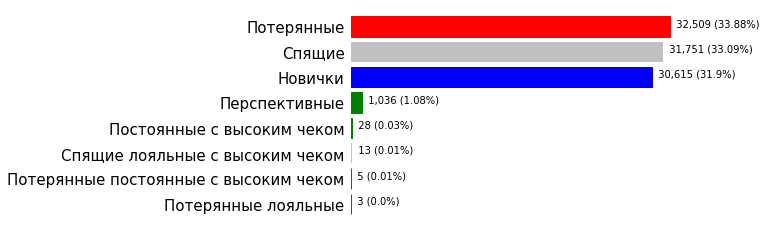

In [59]:
segments_counts = data_rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()
plt.yticks(size=15)
plt.xticks(size=15)
bars = ax.barh(range(len(segments_counts)), segments_counts,color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Постоянные', 'Постоянные с высоким чеком', 'Перспективные']:
            bar.set_color('green')
        if segments_counts.index[i] in ['Новички']:
            bar.set_color('blue')
        if segments_counts.index[i] in ['Потерянные','Потерянные лояльные','Потерянные постоянные с высоким чеком']:
            bar.set_color('red')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '  {:,} ({:}%)'.format(int(value), float(round(value*100/segments_counts.sum(),2)))
               )

plt.show()

В результате вышло примерно одинаковое соотношение потерянных, спящих и новых клиентов.

Видно, что постоянных клиентов у магазина почти нет (не стоит о них забывать и нужно их удерживать), но есть новенькие, которые составляют почти треть от всех клиентов, и перспективные (около 1%). Таким образом, необходимо сделать упор на взаимодействие с ними, чтобы они переросли в постоянных. 

Также можно попробовать "разбудить" спящих, так как они тоже составляют почти треть всех покупателей. Если не исправить ситуацию, то они могут уйти и тогда больше половины клиентов будут считаться потерянными.

Что касается потярянных клиентов, то затраченное время и деньги на попытку их возвращения, могут не оправдать себя.